## Project Customer Lifetime Value (CLV)

CLV adalah metrik  yang menunjukkan jumlah total uang yang diharapkan bisnis dari pelanggan untuk dibelanjakan pada produk dan layanan sepanjang hubungan pelanggan. Angka ini menunjukkan kepada bisnis kapan mereka perlu mengalihkan pengeluaran pemasaran untuk menarik pelanggan baru atau mempertahankan pelanggan yang sudah ada. Metrik ini memberikan nilai numerik tentang seberapa berharganya hubungan pelanggan atau segmen tertentu bagi bisnis dan berapa banyak yang harus diinvestasikan dalam hubungan tersebut. Perusahaan mendapatkan informasi tentang pelanggan dan dapat menciptakan strategi pemasaran yang tepat untuk mencapai tujuan pemasaran mereka dan mengembangkan pelanggan setia yang mendukung merek mereka. Singkatnya, hal ini membantu fokus pada profitabilitas bisnis jangka panjang dibandingkan keuntungan jangka pendek sehingga baik bisnis maupun pelanggan mendapatkan keuntungan.

# 1. Data Preview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
from datetime import datetime, timedelta, date

In [2]:
df = pd.read_csv(r'C:\\Users\\PPL2\\Documents\\Private\\Model\\Pacmann Data Science\\Project\\Project IX/online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.shape

(1067371, 8)

# 2. Data Preprocessing

Sejumlah proses yang dilakukan pada data preprocessing antara lain memisahkan data numerik dan kategorikal, duplikasi, dan missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
def drop_columns(df, columns):
    df1= df.drop(columns, axis=1)
    return df1

In [7]:
df1= drop_columns(df, ["Description", "Country"])

In [8]:
df1

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0
...,...,...,...,...,...,...
1067366,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0
1067367,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0
1067368,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0
1067369,581587,22138,3,2011-12-09 12:50:00,4.95,12680.0


In [9]:
df1.isnull().sum()

Invoice             0
StockCode           0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
dtype: int64

In [10]:
#Let's drop the rows containing NaN
df1.dropna(inplace=True)

In [11]:
df1[df1.duplicated()]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID
371,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0
383,489517,22130,6,2009-12-01 11:34:00,0.85,16329.0
384,489517,22319,12,2009-12-01 11:34:00,0.65,16329.0
385,489517,21913,1,2009-12-01 11:34:00,3.75,16329.0
386,489517,21821,1,2009-12-01 11:34:00,3.75,16329.0
...,...,...,...,...,...,...
1067136,581538,22068,1,2011-12-09 11:34:00,0.39,14446.0
1067150,581538,23318,1,2011-12-09 11:34:00,2.49,14446.0
1067153,581538,22992,1,2011-12-09 11:34:00,1.95,14446.0
1067160,581538,22694,1,2011-12-09 11:34:00,2.10,14446.0


In [12]:
df1.loc[(df1.Invoice=="489517") & (df1.StockCode=="21912")]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID
363,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0
371,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0
394,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0


In [13]:
len(df1[df1.duplicated()])

26481

In [14]:
df1.drop(df1[df1.duplicated()].index, axis=0, inplace=True)

In [15]:
df1.shape

(797883, 6)

In [16]:
# now, no "NULL" and "duplicate" data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797883 entries, 0 to 1067370
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797883 non-null  object 
 1   StockCode    797883 non-null  object 
 2   Quantity     797883 non-null  int64  
 3   InvoiceDate  797883 non-null  object 
 4   Price        797883 non-null  float64
 5   Customer ID  797883 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 42.6+ MB


In [17]:
df1.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0


In [18]:
df2= df1.copy()
df2["TotalPrice"] = df2["Quantity"] * df2["Price"]

In [19]:
for i in df2.columns:
    print(i, "column, unique values: ", df2[i].unique())
    print("************")
    print("")

Invoice column, unique values:  ['489434' '489435' '489436' ... '581585' '581586' '581587']
************

StockCode column, unique values:  ['85048' '79323P' '79323W' ... '23562' '23561' '23843']
************

Quantity column, unique values:  [    12     48     24     10     18      3     16      4      2      6
      8      1     28     30     60     32     56      9     25     36
     20    -12     -6     -4    -24     -3     -2    576    288     27
     64    160      5     -1     72     50     54      7    800     11
     58    192     96    144    100    180    216     15    240    108
     33     90     81    -81    -48     17     -5     40     -8     -9
     13     21    120    200    168     19    280    128   -150    -18
    -23     80    300    450     14     61    480     -7     46    504
     45   4320   5184   4008     22    600    505    500     23     47
    432    252     75    -16   -504   -600   -252   -246    -36    360
    107     49     42     66    -10     34     

In [20]:
for i in df2.columns:
    print(i, "column, unique values: ", df2[i].nunique())
    print("************")
    print("")

Invoice column, unique values:  44876
************

StockCode column, unique values:  4646
************

Quantity column, unique values:  643
************

InvoiceDate column, unique values:  41439
************

Price column, unique values:  1022
************

Customer ID column, unique values:  5942
************

TotalPrice column, unique values:  5625
************



In [21]:
df2.shape

(797883, 7)

In [22]:
df2.loc[(df2["Quantity"]<=0) | (df2["Price"]<=0)]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
178,C489449,22087,-12,2009-12-01 10:33:00,2.95,16321.0,-35.40
179,C489449,85206A,-6,2009-12-01 10:33:00,1.65,16321.0,-9.90
180,C489449,21895,-4,2009-12-01 10:33:00,4.25,16321.0,-17.00
181,C489449,21896,-6,2009-12-01 10:33:00,2.10,16321.0,-12.60
182,C489449,22083,-12,2009-12-01 10:33:00,2.95,16321.0,-35.40
...,...,...,...,...,...,...,...
1065910,C581490,23144,-11,2011-12-09 09:57:00,0.83,14397.0,-9.13
1067002,C581499,M,-1,2011-12-09 10:28:00,224.69,15498.0,-224.69
1067176,C581568,21258,-5,2011-12-09 11:57:00,10.95,15311.0,-54.75
1067177,C581569,84978,-1,2011-12-09 11:58:00,1.25,17315.0,-1.25


In [23]:
df3= df2[(df2['Price'] > 0)]

In [24]:
df3= df3[(df3['Quantity'] > 0)]

In [25]:
df2.shape

(797883, 7)

In [26]:
df3.shape

(779423, 7)

In [27]:
df3.loc[(df3["Quantity"]<=0) | (df3["Price"]<=0)]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice


In [28]:
# ALL ONLY non-numeric stock codes
wrong_stock_codes= df3[df3["StockCode"].astype(str).str.contains(r"^[a-zA-Z''-'\s]{1,40}$")]["StockCode"].unique().tolist()

df3[df3["StockCode"].isin(wrong_stock_codes)].groupby(["StockCode"]).agg({"StockCode": "count"})

,StockCode
StockCode,
ADJUST,32
BANK CHARGES,31
D,5
DOT,16
M,681
PADS,17
POST,1803


In [29]:
df3[df3["StockCode"].isin(wrong_stock_codes)].groupby(["StockCode"]).agg({"StockCode": "count"}).sum()

StockCode    2585
dtype: int64

In [30]:
df3= df3[~df3["StockCode"].isin(wrong_stock_codes)].reset_index(drop=True)

In [31]:
# Other non-numeric stock codes
wrong_stock_codes2= df3[df3["StockCode"].astype(str).str.contains(r"[a-zA-Z]{3,}")]["StockCode"].unique().tolist()
df3[df3["StockCode"].isin(wrong_stock_codes2)].groupby(["StockCode"]).agg({"StockCode": "count"})

,StockCode
StockCode,
ADJUST2,3
TEST001,9
TEST002,1


In [32]:
df3[df3["StockCode"].isin(wrong_stock_codes2)].groupby(["StockCode"]).agg({"StockCode": "count"}).sum()

StockCode    13
dtype: int64

In [33]:
df3= df3[~df3["StockCode"].isin(wrong_stock_codes2)].reset_index(drop=True)

In [34]:
df3

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,83.40
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,81.00
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,81.00
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,100.80
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,30.00
...,...,...,...,...,...,...,...
776820,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,10.20
776821,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,12.60
776822,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,16.60
776823,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,16.60


In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776825 entries, 0 to 776824
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      776825 non-null  object 
 1   StockCode    776825 non-null  object 
 2   Quantity     776825 non-null  int64  
 3   InvoiceDate  776825 non-null  object 
 4   Price        776825 non-null  float64
 5   Customer ID  776825 non-null  float64
 6   TotalPrice   776825 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 41.5+ MB


In [36]:
df3.InvoiceDate = pd.to_datetime(df3.InvoiceDate)

In [37]:
df3["Customer ID"]= df3["Customer ID"].astype('object')

In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776825 entries, 0 to 776824
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      776825 non-null  object        
 1   StockCode    776825 non-null  object        
 2   Quantity     776825 non-null  int64         
 3   InvoiceDate  776825 non-null  datetime64[ns]
 4   Price        776825 non-null  float64       
 5   Customer ID  776825 non-null  object        
 6   TotalPrice   776825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 41.5+ MB


## 3. Life Time Value

Data yang digunakan sebanyak 8 bulan, menghitung RFM dan digunakan untuk memprediksi selama 16 bulan ke depan

In [39]:
df_LTV= df3.copy()

In [40]:
print("First date in dataset: ", df_LTV['InvoiceDate'].min())

First date in dataset:  2009-12-01 07:45:00


In [41]:
print("Last date in dataset: ", df_LTV['InvoiceDate'].max())

Last date in dataset:  2011-12-09 12:50:00


In [42]:
df_last= df_LTV[(df_LTV.InvoiceDate >=  datetime.strptime("2010-8-1", '%Y-%m-%d')) & (df_LTV.InvoiceDate <= df_LTV['InvoiceDate'].max())].reset_index(drop=True)

In [43]:
df_first= df_LTV[(df_LTV.InvoiceDate <  datetime.strptime("2010-8-1", '%Y-%m-%d')) & (df_LTV.InvoiceDate >= df_LTV['InvoiceDate'].min())].reset_index(drop=True)

In [44]:
df_last

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
0,517707,22066,2,2010-08-01 10:06:00,1.45,12843.0,2.90
1,517707,21889,1,2010-08-01 10:06:00,1.25,12843.0,1.25
2,517708,22415,2,2010-08-01 10:09:00,7.95,17243.0,15.90
3,517708,22470,4,2010-08-01 10:09:00,2.95,17243.0,11.80
4,517708,22483,2,2010-08-01 10:09:00,2.95,17243.0,5.90
...,...,...,...,...,...,...,...
558575,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,10.20
558576,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,12.60
558577,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,16.60
558578,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,16.60


In [45]:
df_first

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,83.40
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,81.00
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,81.00
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,100.80
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,30.00
...,...,...,...,...,...,...,...
218240,517704,22659,6,2010-07-30 17:08:00,1.95,14031.0,11.70
218241,517704,21658,3,2010-07-30 17:08:00,3.95,14031.0,11.85
218242,517704,22328,8,2010-07-30 17:08:00,2.95,14031.0,23.60
218243,517704,37370,72,2010-07-30 17:08:00,1.06,14031.0,76.32


# RFM Score
Salah satu metode yang popular dan efektif untuk menganalisa perilaku pelanggan adalah RFM analysis. RFM adalah for Recency, Frequency, and Monetary value, dan setiap factor berkorespondensi karakteristik kunci pelanggan. Metrik ini juga dapat mengindikasikan aktifitas fraud, karena pembelian dalam frekuensi tinggi dan nilai keuangan yang besar dapat menandakan transakti yang mencurigakan.

In [46]:
RFM_df= pd.DataFrame(df_first['Customer ID'].unique())
RFM_df.columns = ['Customer ID']
RFM_df

,Customer ID
0,13085.0
1,13078.0
2,15362.0
3,18102.0
4,12682.0
...,...
3132,14346.0
3133,16428.0
3134,17109.0
3135,17735.0


In [47]:
recency_df= df_first.groupby('Customer ID')['InvoiceDate'].max().reset_index()
recency_df

,Customer ID,InvoiceDate
0,12346.0,2010-06-28 13:53:00
1,12349.0,2010-04-29 13:20:00
2,12355.0,2010-05-21 11:59:00
3,12358.0,2010-06-07 12:28:00
4,12359.0,2010-06-22 10:24:00
...,...,...
3132,18281.0,2010-05-11 10:49:00
3133,18283.0,2010-03-28 13:21:00
3134,18285.0,2010-02-17 10:24:00
3135,18286.0,2009-12-16 10:45:00


In [48]:
last_day_df_first= df_first['InvoiceDate'].max()
last_day_df_first

Timestamp('2010-07-30 17:08:00')

In [49]:
recency_df['Recency']= recency_df['InvoiceDate'].apply(lambda x: (last_day_df_first - x).days)
recency_df

,Customer ID,InvoiceDate,Recency
0,12346.0,2010-06-28 13:53:00,32
1,12349.0,2010-04-29 13:20:00,92
2,12355.0,2010-05-21 11:59:00,70
3,12358.0,2010-06-07 12:28:00,53
4,12359.0,2010-06-22 10:24:00,38
...,...,...,...
3132,18281.0,2010-05-11 10:49:00,80
3133,18283.0,2010-03-28 13:21:00,124
3134,18285.0,2010-02-17 10:24:00,163
3135,18286.0,2009-12-16 10:45:00,226


In [50]:
RFM_df= pd.merge(RFM_df, recency_df[['Customer ID','Recency']], on='Customer ID')
RFM_df

,Customer ID,Recency
0,13085.0,182
1,13078.0,3
2,15362.0,241
3,18102.0,0
4,12682.0,15
...,...,...
3132,14346.0,0
3133,16428.0,0
3134,17109.0,0
3135,17735.0,0


In [51]:
#order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [52]:
from sklearn.cluster import KMeans

In [53]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Recency']])
RFM_df['RecencyCluster'] = kmeans.predict(RFM_df[['Recency']])
RFM_df

,Customer ID,Recency,RecencyCluster
0,13085.0,182,1
1,13078.0,3,2
2,15362.0,241,1
3,18102.0,0,2
4,12682.0,15,2
...,...,...,...
3132,14346.0,0,2
3133,16428.0,0,2
3134,17109.0,0,2
3135,17735.0,0,2


In [54]:
RFM_df= order_cluster('RecencyCluster', 'Recency', RFM_df, False)
RFM_df

,Customer ID,Recency,RecencyCluster
0,13085.0,182,0
1,15362.0,241,0
2,13635.0,227,0
3,15413.0,194,0
4,17592.0,241,0
...,...,...,...
3132,13745.0,48,2
3133,16021.0,47,2
3134,13545.0,47,2
3135,14581.0,47,2


In [55]:
RecencyCluster_Stats = RFM_df.groupby("RecencyCluster")["Recency"].describe()
RecencyCluster_Stats

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,348.0,212.614943,23.444115,175.0,187.0,225.0,233.25,241.0
1,587.0,136.025554,19.060288,105.0,121.0,134.0,151.00,173.0
2,896.0,72.901786,16.773128,47.0,57.0,72.0,86.00,103.0
3,1306.0,19.693721,13.966339,0.0,7.0,18.0,31.00,46.0


In [56]:
frequency_df= df_first.groupby(["Customer ID"]).agg({"Invoice":"nunique"}).reset_index()
frequency_df.rename(columns={"Invoice":"Frequency"}, inplace=True)
frequency_df

,Customer ID,Frequency
0,12346.0,2
1,12349.0,1
2,12355.0,1
3,12358.0,2
4,12359.0,5
...,...,...
3132,18281.0,1
3133,18283.0,3
3134,18285.0,1
3135,18286.0,1


In [57]:
RFM_df= pd.merge(RFM_df, frequency_df, on='Customer ID')
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency
0,13085.0,182,0,6
1,15362.0,241,0,1
2,13635.0,227,0,2
3,15413.0,194,0,5
4,17592.0,241,0,1
...,...,...,...,...
3132,13745.0,48,2,1
3133,16021.0,47,2,1
3134,13545.0,47,2,1
3135,14581.0,47,2,1


In [58]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Frequency']])
RFM_df['FrequencyCluster'] = kmeans.predict(RFM_df[['Frequency']])
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,13085.0,182,0,6,3
1,15362.0,241,0,1,0
2,13635.0,227,0,2,0
3,15413.0,194,0,5,3
4,17592.0,241,0,1,0
...,...,...,...,...,...
3132,13745.0,48,2,1,0
3133,16021.0,47,2,1,0
3134,13545.0,47,2,1,0
3135,14581.0,47,2,1,0


In [59]:
RFM_df= order_cluster('FrequencyCluster', 'Frequency', RFM_df, True)
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,13085.0,182,0,6,1
1,15413.0,194,0,5,1
2,14987.0,221,0,4,1
3,14063.0,189,0,7,1
4,17519.0,22,3,8,1
...,...,...,...,...,...
3132,14606.0,1,3,62,3
3133,13694.0,0,3,81,3
3134,12748.0,2,3,56,3
3135,17850.0,11,3,81,3


In [60]:
FrequencyCluster_Stats= RFM_df.groupby("FrequencyCluster")["Frequency"].describe()
FrequencyCluster_Stats

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,2292.0,1.606021,0.752484,1.0,1.0,1.0,2.0,3.0
1,727.0,5.741403,1.870234,4.0,4.0,5.0,7.0,11.0
2,101.0,17.217822,5.944079,12.0,13.0,15.0,19.0,36.0
3,17.0,58.058824,15.562256,38.0,46.0,56.0,62.0,88.0


In [61]:
monetary_df= df_first.groupby('Customer ID')['TotalPrice'].sum().reset_index()
monetary_df.columns = ['Customer ID', 'Monetary']
monetary_df.head()

,Customer ID,Monetary
0,12346.0,169.36
1,12349.0,1068.52
2,12355.0,488.21
3,12358.0,1697.93
4,12359.0,2012.03


In [62]:
RFM_df= pd.merge(RFM_df, monetary_df, on='Customer ID')
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary
0,13085.0,182,0,6,1,2017.20
1,15413.0,194,0,5,1,6798.72
2,14987.0,221,0,4,1,566.70
3,14063.0,189,0,7,1,9471.50
4,17519.0,22,3,8,1,2621.31
...,...,...,...,...,...,...
3132,14606.0,1,3,62,3,12085.93
3133,13694.0,0,3,81,3,106707.71
3134,12748.0,2,3,56,3,7670.00
3135,17850.0,11,3,81,3,36066.05


In [63]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Monetary']])
RFM_df['MonetaryCluster']= kmeans.predict(RFM_df[['Monetary']])
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster
0,13085.0,182,0,6,1,2017.20,0
1,15413.0,194,0,5,1,6798.72,0
2,14987.0,221,0,4,1,566.70,0
3,14063.0,189,0,7,1,9471.50,0
4,17519.0,22,3,8,1,2621.31,0
...,...,...,...,...,...,...,...
3132,14606.0,1,3,62,3,12085.93,0
3133,13694.0,0,3,81,3,106707.71,1
3134,12748.0,2,3,56,3,7670.00,0
3135,17850.0,11,3,81,3,36066.05,2


In [64]:
RFM_df= order_cluster('MonetaryCluster', 'Monetary', RFM_df, True)
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster
0,13085.0,182,0,6,1,2017.20,0
1,15413.0,194,0,5,1,6798.72,0
2,14987.0,221,0,4,1,566.70,0
3,14063.0,189,0,7,1,9471.50,0
4,17519.0,22,3,8,1,2621.31,0
...,...,...,...,...,...,...,...
3132,17448.0,32,3,41,3,14448.67,1
3133,18102.0,0,3,61,3,222525.28,3
3134,14156.0,5,3,51,3,135980.33,2
3135,14646.0,8,3,38,3,132690.81,2


In [65]:
MonetaryCluster_Stats= RFM_df.groupby("MonetaryCluster")["Monetary"].describe()
MonetaryCluster_Stats

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,3099.0,1070.028261,1477.097908,1.55,256.4100,561.25,1256.15,12916.15
1,34.0,25074.632353,12736.899487,13776.74,15635.6675,19927.71,30937.89,69700.34
2,3.0,125126.283333,16035.526751,106707.71,119699.2600,132690.81,134335.57,135980.33
3,1.0,222525.280000,NaN,222525.28,222525.2800,222525.28,222525.28,222525.28


Let's calculate Overall Scores:

- 0 to 2: Low Value
- 3 to 4: Mid Value
- 5+: High Value

In [66]:
#overall scoring
RFM_df['OverallScore'] = RFM_df['RecencyCluster'] + RFM_df['FrequencyCluster'] + RFM_df['MonetaryCluster']
RFM_df['Segment'] = 'Low-Value'
RFM_df.loc[RFM_df['OverallScore']>2,'Segment'] = 'Mid-Value' 
RFM_df.loc[RFM_df['OverallScore']>4,'Segment'] = 'High-Value'
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment
0,13085.0,182,0,6,1,2017.20,0,1,Low-Value
1,15413.0,194,0,5,1,6798.72,0,1,Low-Value
2,14987.0,221,0,4,1,566.70,0,1,Low-Value
3,14063.0,189,0,7,1,9471.50,0,1,Low-Value
4,17519.0,22,3,8,1,2621.31,0,4,Mid-Value
...,...,...,...,...,...,...,...,...,...
3132,17448.0,32,3,41,3,14448.67,1,7,High-Value
3133,18102.0,0,3,61,3,222525.28,3,9,High-Value
3134,14156.0,5,3,51,3,135980.33,2,8,High-Value
3135,14646.0,8,3,38,3,132690.81,2,8,High-Value


In [67]:
monetary_df_last= df_last.groupby('Customer ID')['TotalPrice'].sum().reset_index()
monetary_df_last.columns = ['Customer ID', 'lastMonthsMonetary']
monetary_df_last['Customer ID']= monetary_df_last['Customer ID'].astype("object")
monetary_df_last.head()

,Customer ID,lastMonthsMonetary
0,12346.0,77183.60
1,12347.0,4921.53
2,12348.0,1658.40
3,12349.0,2610.17
4,12350.0,294.40


In [68]:
monetary_df_last= monetary_df_last[monetary_df_last["lastMonthsMonetary"] <= monetary_df_last["lastMonthsMonetary"].quantile(0.99)]

In [69]:
monetary_df_last.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5105 entries, 1 to 5156
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         5105 non-null   object 
 1   lastMonthsMonetary  5105 non-null   float64
dtypes: float64(1), object(1)
memory usage: 119.6+ KB


In [70]:
RFM_df_NEW = pd.merge(RFM_df, monetary_df_last, on='Customer ID', how='left')
RFM_df_NEW = RFM_df_NEW.fillna(0)
RFM_df_NEW['Customer ID']= RFM_df_NEW['Customer ID'].astype("object")
RFM_df_NEW

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary
0,13085.0,182,0,6,1,2017.20,0,1,Low-Value,416.08
1,15413.0,194,0,5,1,6798.72,0,1,Low-Value,0.00
2,14987.0,221,0,4,1,566.70,0,1,Low-Value,983.95
3,14063.0,189,0,7,1,9471.50,0,1,Low-Value,0.00
4,17519.0,22,3,8,1,2621.31,0,4,Mid-Value,2152.86
...,...,...,...,...,...,...,...,...,...,...
3132,17448.0,32,3,41,3,14448.67,1,7,High-Value,0.00
3133,18102.0,0,3,61,3,222525.28,3,9,High-Value,0.00
3134,14156.0,5,3,51,3,135980.33,2,8,High-Value,0.00
3135,14646.0,8,3,38,3,132690.81,2,8,High-Value,0.00


In [71]:
RFM_df_NEW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         3137 non-null   object 
 1   Recency             3137 non-null   int64  
 2   RecencyCluster      3137 non-null   int64  
 3   Frequency           3137 non-null   int64  
 4   FrequencyCluster    3137 non-null   int64  
 5   Monetary            3137 non-null   float64
 6   MonetaryCluster     3137 non-null   int64  
 7   OverallScore        3137 non-null   int64  
 8   Segment             3137 non-null   object 
 9   lastMonthsMonetary  3137 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 245.2+ KB


Di sini, kita membuat segment dari CLV, karena akan lebih dapat ditindaklanjuti dan lebih mudah untuk dikomunikasikan dengan orang lain 

Dengan menggunakan K-means clustering, kita bisa mengindentifikasi grup CLV eksisting dan membuat segment atas itu.

Mempertimbangkan bagian bisnis dari analisis ini, kita perlu memperlakukan konsumen secara berbeda berdasarkan CLV yang diprediksi

Sebagai contoh, kita mengaplikasikan clustering dan mendapatkan 3 segmen (jumlah segmen bergantung pada dinamika bisnis dan tujuan):

    Low CLV
    Mid CLV
    High CLV

Kita gunakan K-means clustering untuk menentukan segmen dan mengobservasi karakteristiknya :

In [72]:
#creating 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(RFM_df_NEW[['lastMonthsMonetary']])
RFM_df_NEW['LTVCluster'] = kmeans.predict(RFM_df_NEW[['lastMonthsMonetary']])

In [73]:
RFM_df_NEW = order_cluster('LTVCluster', 'lastMonthsMonetary', RFM_df_NEW, True)
RFM_df_NEW

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary,LTVCluster
0,13085.0,182,0,6,1,2017.20,0,1,Low-Value,416.08,0
1,15413.0,194,0,5,1,6798.72,0,1,Low-Value,0.00,0
2,14987.0,221,0,4,1,566.70,0,1,Low-Value,983.95,0
3,14063.0,189,0,7,1,9471.50,0,1,Low-Value,0.00,0
4,17519.0,22,3,8,1,2621.31,0,4,Mid-Value,2152.86,0
...,...,...,...,...,...,...,...,...,...,...,...
3132,14258.0,2,3,12,2,14544.72,1,6,High-Value,17506.62,2
3133,12709.0,4,3,13,2,16536.40,1,6,High-Value,12950.78,2
3134,16754.0,30,3,24,2,46631.47,1,6,High-Value,18868.60,2
3135,14527.0,2,3,47,3,16021.55,1,7,High-Value,11169.55,2


In [74]:
#creating a new cluster dataframe
df_LTVCluster = RFM_df_NEW.copy()
df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,2467.0,644.062793,709.641174,0.00,0.0000,395.950,1051.9050,2610.17
1,544.0,4576.775129,1589.190147,2625.62,3222.9575,4079.940,5615.3200,8548.72
2,126.0,12686.642063,3365.669323,8747.39,9858.1050,11778.785,14804.8575,23068.77


Kita telah menyelesaikan CLV clustering.

cluster 2 adalah yang terbaik dengan rata-rata 12686 CLV di mana 0 adalah yang terburuk dengan  644.


## 4. Model Building

In [75]:
df_ML= df_LTVCluster.copy()

In [76]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         3137 non-null   object 
 1   Recency             3137 non-null   int64  
 2   RecencyCluster      3137 non-null   int64  
 3   Frequency           3137 non-null   int64  
 4   FrequencyCluster    3137 non-null   int64  
 5   Monetary            3137 non-null   float64
 6   MonetaryCluster     3137 non-null   int64  
 7   OverallScore        3137 non-null   int64  
 8   Segment             3137 non-null   object 
 9   lastMonthsMonetary  3137 non-null   float64
 10  LTVCluster          3137 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 269.7+ KB


In [77]:
for i in ["Customer ID","RecencyCluster","FrequencyCluster", "MonetaryCluster", "Segment", "LTVCluster"]:
    df_ML[i]= df_ML[i].astype('object')

In [78]:
Num= df_ML.select_dtypes(exclude='object').columns.tolist()
Num

['Recency', 'Frequency', 'Monetary', 'OverallScore', 'lastMonthsMonetary']

In [79]:
from sklearn.preprocessing import StandardScaler
scalerNum= StandardScaler()

for cols in Num:
    df_ML[cols] = scalerNum.fit_transform(df_ML[[cols]])

In [80]:
Cat= df_ML.select_dtypes(include='object').columns.tolist()
Cat

['Customer ID',
 'RecencyCluster',
 'FrequencyCluster',
 'MonetaryCluster',
 'Segment',
 'LTVCluster']

In [81]:
from sklearn.preprocessing import LabelEncoder
df_ML = df_ML.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
df_ML.head()

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary,LTVCluster
0,350,1.575357,0,0.483320,1,0.078294,0,-0.963914,1,-0.479931,0
1,1598,1.757235,0,0.299341,1,0.830381,0,-0.963914,1,-0.623214,0
2,1377,2.166462,0,0.115361,1,-0.149856,0,-0.963914,1,-0.284376,0
3,872,1.681452,0,0.667300,1,1.250784,0,-0.963914,1,-0.623214,0
4,2728,-0.849689,3,0.851280,1,0.173315,0,1.204720,2,0.118155,0


In [82]:
X = df_ML.drop(['LTVCluster','lastMonthsMonetary'], axis=1)
y = df_ML['LTVCluster']

In [83]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb

In [85]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Random Forest' : RandomForestClassifier(),
    'XG Boosting' : XGBClassifier()
}

In [86]:
%%time
for name, model in models.items():
    print(f'{name} training started')
    model.fit(X_train, y_train)
    print(f'{name} trained')
    print("*"*40)
print("FINISHED")

K-Nearest Neighbors training started
K-Nearest Neighbors trained
****************************************
Logistic Regression training started
Logistic Regression trained
****************************************
Random Forest training started
Random Forest trained
****************************************
XG Boosting training started
XG Boosting trained
****************************************
FINISHED
CPU times: total: 5.16 s
Wall time: 1.84 s


In [87]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

In [88]:
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.756
Logistic Regression accuracy score :  0.786
Random Forest accuracy score :  0.815
XG Boosting accuracy score :  0.808


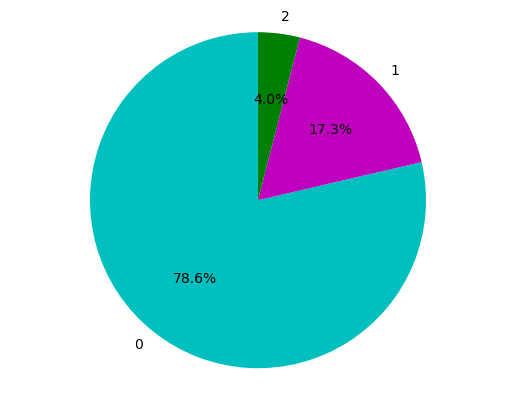

In [89]:
labels= df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe().index
colors=['c', 'm', 'g']
sizes= df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe()["count"]
LTVCluster_Pie= plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Cluster terbesar adalah  cluster 0 yang mencakup 78.6% dari total base. Jika kita hanya melihat pada hasil ini maka setiap pelanggan adalah bagian dari to cluster 0, dan akurasi adalah 78.6%.

82% vs 78.6% menunjukkan bahwa model machine learning bermanfaat, tapi memerlukan perbaikan. Perlu dicari tahu di bagian mana model kurang berfungsi dengan baik

Kita bisa mengidentifikasi dengan melihat kepada laporan klasifikasi :



In [90]:
for name in models:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models.get(name).predict(X_test)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       819
           1       0.19      0.07      0.10       170
           2       0.00      0.00      0.00        47

    accuracy                           0.76      1036
   macro avg       0.33      0.34      0.32      1036
weighted avg       0.66      0.76      0.70      1036

******************************
 
Logistic Regression classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       819
           1       0.12      0.01      0.01       170
           2       0.00      0.00      0.00        47

    accuracy                           0.79      1036
   macro avg       0.31      0.33      0.30      1036
weighted avg       0.65      0.79      0.70      1036

******************************
 
Random Forest classifica

Jika kita lihat Gradient Boosting model;

Precision dan recall dapat diterima untuk cluster 0.

Sebagai contoh, untuk cluster 0 (Low CLV), jika model memberitahukan bahwa pelanggan yang merupakan bagian dari cluster 0, sebanyak 88 dari 100 adalah benar (precision), dan model sukses mengidentifikasi 92% pelanggan cluster 0 (recall)

Model ini perlu ditingkatkan untuk cluster lain. Sebagai contoh, model ini tidak dapat mendeteksi class CLV yang lain. Opsi yang mungkin untuk memperbaikinya : 

    Menambahkan fitur dan meningkatkan feature engineering
    Menggunakan hyper parameter tuning pada model
    Menambahkan lebih banyak data ke model jika memungkinkan 



## Hyperparameter Tuning

In [91]:
from sklearn import model_selection

In [92]:
knn = KNeighborsClassifier(weights='distance')
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
knn_model = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring= 'recall')
#print('Recall Mean:', knn_model.mean().round(4))
#print('Std:', knn_model.std().round(4))

In [93]:
params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 1.5, 2]
}

# ----------------------------------------------------------------------
model = KNeighborsClassifier()
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search_knn = model_selection.GridSearchCV(model, 
                                               param_grid = params, scoring = 'recall', 
                                               cv = kfold)

grid_search_knn.fit(X_train, y_train)
print('Best parameters: ', grid_search_knn.best_params_)

Best parameters:  {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [94]:
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
lr = LogisticRegression(random_state=42, class_weight='balanced')
lr_model = model_selection.cross_val_score(lr, X, y, cv=kfold, scoring= 'recall')

In [95]:
params ={'C': [0.1, 1, 10, 100],
         'penalty': ['l1', 'l2'],
         'solver': ['liblinear', 'saga'] }

# -------------------------------------------------------------------------------
model = LogisticRegression(random_state=42)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True,random_state = 42)
grid_search_lr = model_selection.GridSearchCV(model, param_grid = params, 
                                              scoring = 'recall', cv = kfold)

grid_search_lr.fit(X_train, y_train)
print('Best parameters: ', grid_search_lr.best_params_)

Best parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [96]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
rf_model = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring= 'recall')

In [97]:
params ={'criterion' : ['gini', 'entropy'],
         'n_estimators': [100, 200, 300],
         'max_depth': [3, 5, 7, 10],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]}

# -------------------------------------------------------------------------------
model = RandomForestClassifier(random_state=42, class_weight='balanced')
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search_rf = model_selection.GridSearchCV(model, param_grid = params, 
                                              scoring = 'recall', cv = kfold)

grid_search_rf.fit(X_train, y_train)
print('Best parameters: ', grid_search_rf.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [98]:
xgb = XGBClassifier(random_state=42) 
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
xgb_model = model_selection.cross_val_score(xgb, X, y, cv=kfold, scoring= 'recall')

In [99]:
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'n_estimators': [100, 500, 1000],
    'scale_pos_weight': [5, 10, 15] # set the class weight
}

# ----------------------------------------------------------------------
model = XGBClassifier(random_state=42)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search_xgb = model_selection.GridSearchCV(model, 
                                               param_grid = params, scoring = 'recall', 
                                               cv = kfold)

grid_search_xgb.fit(X_train, y_train)
print('Best parameters: ', grid_search_xgb.best_params_)

Best parameters:  {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 5}


In [100]:
models1 = {
    'K-Nearest Neighbors' : KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors = 3, p = 1, weights= 'uniform'),
    'Logistic Regression' : LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear'),
    'Random Forest' : RandomForestClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100),
    'XG Boosting' : XGBClassifier(learning_rate = 0.001, max_depth = 3, n_estimators = 100, scale_pos_weight = 5)
}

In [101]:
%%time
for name, model in models1.items():
    print(f'{name} training started')
    model.fit(X_train, y_train)
    print(f'{name} trained')
    print("*"*40)
print("FINISHED")

K-Nearest Neighbors training started
K-Nearest Neighbors trained
****************************************
Logistic Regression training started
Logistic Regression trained
****************************************
Random Forest training started
Random Forest trained
****************************************
XG Boosting training started
XG Boosting trained
****************************************
FINISHED
CPU times: total: 1.59 s
Wall time: 419 ms


In [102]:
for name in models1:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.756
Logistic Regression accuracy score :  0.786
Random Forest accuracy score :  0.815
XG Boosting accuracy score :  0.808


In [104]:
for name in models1:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models1.get(name).predict(X_test)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       819
           1       0.30      0.20      0.24       170
           2       0.00      0.00      0.00        47

    accuracy                           0.76      1036
   macro avg       0.37      0.37      0.37      1036
weighted avg       0.69      0.76      0.72      1036

******************************
 
Logistic Regression classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       819
           1       0.32      0.04      0.07       170
           2       0.00      0.00      0.00        47

    accuracy                           0.79      1036
   macro avg       0.37      0.34      0.32      1036
weighted avg       0.68      0.79      0.71      1036

******************************
 
Random Forest classifica